In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta

In [2]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('biometria.xlsx', sheet_name='Página1')
print(df.tail(10))

     Index    peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeca  \
664  665.0  492.04               29.0                24.8                 8.0   
665  666.0  454.02               27.0                23.0                 7.6   
666  667.0  480.56               27.1                22.8                 7.5   
667  668.0  412.75               25.7                22.0                 7.5   
668  669.0  471.80               27.2                23.4                 7.4   
669  670.0  382.79               25.4                21.5                 7.5   
670  671.0  401.90               26.5                22.3                 7.2   
671  672.0  441.98               27.8                23.4                 7.5   
672  673.0  468.54               28.0                23.5                 7.8   
673  674.0  418.14               26.3                22.2                 7.4   

     altura  espessura       data  
664     9.1        3.2 2024-06-12  
665     9.0        3.2 2024-06-12  


In [3]:
# Dropping the columns
df2 = df.drop(columns=[
'data', 
'Index',
'espessura'
])
df2.head()

,peso,comprimento_Total,comprimento_Padrao,comprimento_Cabeca,altura
0,51.45,14.3,12.2,4.0,4.1
1,37.15,12.4,10.9,3.8,3.2
2,47.26,13.7,11.2,3.4,4.0
3,36.67,12.9,11.1,3.7,3.7
4,45.48,13.2,11.3,3.8,4.5


In [4]:
####### BLIND TEST

#data = df2.sample(frac=0.95, random_state=123)
#data_unseen = df2.drop(data.index)

#data.reset_index(drop=True, inplace=True)
#data_unseen.reset_index(drop=True, inplace=True)

#print('Data for Modeling: ' + str(data.shape))
#print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [5]:
from pycaret.regression import *
#### DATA for BLIND TEST
#exp2= setup(data = data,  target = 'peso')

exp2= setup(data = df2,  target = 'peso')
best_model = exp2.compare_models()

,Description,Value
0,Session id,6210
1,Target,peso
2,Target type,Regression
3,Original data shape,"(674, 5)"
4,Transformed data shape,"(674, 5)"
5,Transformed train set shape,"(471, 5)"
6,Transformed test set shape,"(203, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,10.1110,277.4832,16.2807,0.9812,0.0729,0.0553,0.0250
rf,Random Forest Regressor,10.5296,284.2798,16.5917,0.9807,0.0723,0.0559,0.0480
et,Extra Trees Regressor,10.5763,294.3020,16.9538,0.9800,0.0745,0.0557,0.0400
lightgbm,Light Gradient Boosting Machine,10.4474,296.5545,16.8750,0.9798,0.0711,0.0552,0.0630
xgboost,Extreme Gradient Boosting,11.3289,329.3447,17.7246,0.9770,0.0800,0.0620,0.0840
ada,AdaBoost Regressor,13.6338,373.4181,19.0205,0.9747,0.1395,0.1101,0.0180
dt,Decision Tree Regressor,13.9021,492.6626,21.8484,0.9668,0.0929,0.0715,0.0080
knn,K Neighbors Regressor,11.3469,629.4100,21.1476,0.9615,0.0913,0.0662,0.0100
llar,Lasso Least Angle Regression,21.0195,669.6546,25.7616,0.9541,0.5450,0.2066,0.0070
lasso,Lasso Regression,21.0220,669.7217,25.7630,0.9541,0.5450,0.2067,0.0140


In [6]:
rf = exp2.create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,10.6023,264.1411,16.2524,0.9854,0.0776,0.0566
1,10.2689,221.9085,14.8966,0.9817,0.0654,0.0524
2,11.2587,276.8907,16.6400,0.9777,0.0700,0.0579
3,10.3058,238.5721,15.4458,0.9874,0.0602,0.0478
4,10.0581,218.7302,14.7895,0.9847,0.0694,0.0522
5,11.9945,458.3434,21.4090,0.9701,0.0823,0.0579
6,11.9695,350.8778,18.7317,0.9797,0.0860,0.0657
7,8.1778,184.7945,13.5939,0.9877,0.0570,0.0463
8,12.3410,476.5821,21.8308,0.9674,0.0809,0.0629


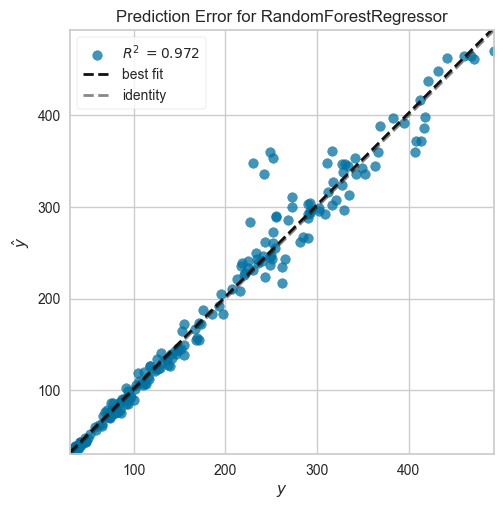

In [7]:
exp2.plot_model(rf, plot = 'error')

In [8]:
exp2.evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [9]:
peso_pred_semEspe = exp2.predict_model(rf)
peso_pred_semEspe.tail(5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,10.8718,403.2736,20.0817,0.9717,0.0792,0.0571


,comprimento_Total,comprimento_Padrao,comprimento_Cabeca,altura,peso,prediction_label
213,17.000000,14.500000,4.5,4.9,93.430000,99.037899
43,12.400000,10.200000,3.1,3.7,37.549999,35.149201
580,22.400000,19.000000,6.0,7.0,234.309998,243.836798
247,17.200001,14.600000,4.8,5.3,111.919998,107.711531
662,27.500000,23.200001,7.8,8.0,432.079987,448.500197


# Continuidade do Modelo

In [10]:
### Saving model 

#save_model(rf, 'rf_weight') 


In [11]:
################### LOADING MODEL
saved_rf = load_model('rf_weight') 

saved_rf 

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\crist\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['comprimento_Total',
                                             'comprimento_Padrao',
                                             'comprimento_Cabeca', 'altura'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 RandomForestRegressor(n_jobs=-1, random_state=8604))])

In [12]:
exp2.predict_model(saved_rf)

,comprimento_Total,comprimento_Padrao,comprimento_Cabeca,altura,peso,prediction_label
502,23.500000,20.900000,6.4,8.0,326.980011,301.370901
335,19.200001,16.500000,5.5,5.8,155.100006,156.386305
249,18.799999,16.299999,5.0,5.5,140.460007,139.332205
170,16.200001,13.800000,4.4,5.0,87.370003,89.491601
459,23.100000,19.799999,6.1,7.5,268.029999,275.670200
...,...,...,...,...,...,...
213,17.000000,14.500000,4.5,4.9,93.430000,94.258500
43,12.400000,10.200000,3.1,3.7,37.549999,34.802700
580,22.400000,19.000000,6.0,7.0,234.309998,245.634699
247,17.200001,14.600000,4.8,5.3,111.919998,109.689898


In [13]:
##################### BLIND TEST
#pred_unseen = predict_model(rf, data = data_unseen)
#pred_unseen.head(5)